<a href="https://colab.research.google.com/github/Yuyan-C/MAIS202Project/blob/main/newKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
df = pd.read_csv('covtype.csv')
x = df['Horizontal_Distance_To_Hydrology'].values
y = df['Vertical_Distance_To_Hydrology'].values
distance = np.sqrt(np.square(x)+np.square(y))
df = df.drop(['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], axis=1)
df.insert(3, "Distance_To_Hydrology", distance)
# set the number of training set, validation set, and testing set
# get the number of features 
num_features = len(df.columns)-1
# set X and y
scaler = MinMaxScaler() 
X = scaler.fit_transform(df.iloc[:, :num_features])
y = df.iloc[:, num_features:].to_numpy().reshape(len(df.index))
# set training, validation, and testing sets
# 64% training, 16% validation, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)
print("testing set:", y_test.shape)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle = True)
print("validation set:", y_valid.shape)
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)
print("training set:", y_train.shape)


testing set: (116203,)
validation set: (92962,)
training set: (1270115,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


01:47:46.122867
fitting...
01:47:46.123899
predicting training set...
01:58:10.783731
predicting validation set...
05:14:05.478019
predicting testing set...
05:37:18.039911
training accuracy: 0.9868759915440728
validation accuracy: 0.9203868247240808
testing accuracy: 0.9215424730858928
training accuracy (balanced): 0.9868759915440728
validation accuracy (balanced): 0.9055019767207738
testing accuracy (balanced): 0.9078861036647291
06:06:19.463122
confusion matrix for training set:
 [[175103   6690      0      0      0      0      0]
 [  4989 171144      0      0      0      0      0]
 [    17    885 181419      0      0      0      0]
 [     0      4      7 181445      0      0      0]
 [   214   1678      0      0 181445      0      0]
 [    57    814     19      0      0 181445      0]
 [  1065    230      0      0      0      0 181445]]


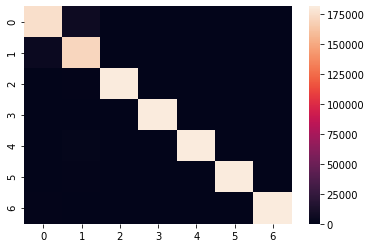

confusion matrix for validation set:
 [[31316  2650     3     0    17     0    73]
 [ 2009 41431    34     0   104    38    12]
 [    6   312  5392    59    20   266     0]
 [    0     0    48   374     0    18     0]
 [   83   600    18     0  1350     6     0]
 [   15   294   277    30    10  2440     0]
 [  330    69     0     0     0     0  3258]]


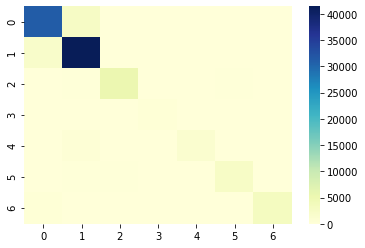

confusion matrix for validation set:
 [[39511  3308     3     0    19     5    68]
 [ 2447 51612    33     0   125    49    12]
 [    5   342  6691    74    22   294     0]
 [    0     0    52   417     0    28     0]
 [  116   768    29     0  1820    12     1]
 [   20   372   313    35     9  3101     0]
 [  458    98     0     0     0     0  3934]]


NameError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5) 
print(datetime.now().strftime("%H:%M:%S.%f"))
print("fitting...")
print(datetime.now().strftime("%H:%M:%S.%f"))
clf.fit(X_train,y_train)
print("predicting training set...")
print(datetime.now().strftime("%H:%M:%S.%f"))
y_train_pred = clf.predict(X_train)
print("predicting validation set...")
print(datetime.now().strftime("%H:%M:%S.%f"))
y_valid_pred = clf.predict(X_valid)
print("predicting testing set...")
print(datetime.now().strftime("%H:%M:%S.%f"))
y_test_pred = clf.predict(X_test)
print("training accuracy: {}".format(accuracy_score(y_train, y_train_pred)))
print("validation accuracy: {}".format(accuracy_score(y_valid,y_valid_pred)))
print("testing accuracy: {}".format(accuracy_score(y_test,y_test_pred)))
print("training accuracy (balanced): {}".format(balanced_accuracy_score(y_train, y_train_pred)))
print("validation accuracy (balanced): {}".format(balanced_accuracy_score(y_valid, y_valid_pred)))
print("testing accuracy (balanced): {}".format(balanced_accuracy_score(y_test, y_test_pred)))
print(datetime.now().strftime("%H:%M:%S.%f"))
#Confusion matrix whose i-th row and j-th column entry 
#indicates the number of samples with true label 
#being i-th class and predicted label being j-th class.
cf_matrix_train = confusion_matrix(y_train_pred, y_train)
print("confusion matrix for training set:\n {}".format(cf_matrix_train))
sns.heatmap(cf_matrix_train, annot=False)
plt.show()
cf_matrix_valid = confusion_matrix(y_valid_pred, y_valid)
print("confusion matrix for validation set:\n {}".format(cf_matrix_valid))
sns.heatmap(cf_matrix_valid, annot=False,cmap="YlGnBu")
plt.show()

 

confusion matrix for validation set:
 [[39511  3308     3     0    19     5    68]
 [ 2447 51612    33     0   125    49    12]
 [    5   342  6691    74    22   294     0]
 [    0     0    52   417     0    28     0]
 [  116   768    29     0  1820    12     1]
 [   20   372   313    35     9  3101     0]
 [  458    98     0     0     0     0  3934]]


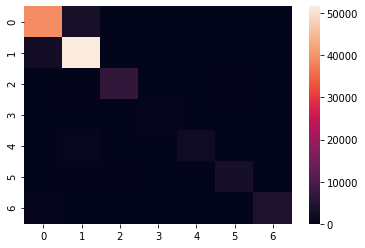

In [ ]:
cf_matrix_test = confusion_matrix(y_test_pred, y_test)
print("confusion matrix for validation set:\n {}".format(cf_matrix_test))
sns.heatmap(cf_matrix_test, annot=False)
plt.show()
 